In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(3)

,id,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,target
0,1,-6.149463,-0.929714,9.058368,-7.017854,-2.958471,0.179233,-0.956591,-0.972401,5.956213,...,-7.026436,-6.006282,-6.005836,7.043084,21.884650,-3.064152,-5.247552,-6.026107,-11.990822,1
1,2,-2.238836,-1.003511,5.098079,-10.880357,-0.804562,-2.992123,26.972724,-8.900861,-5.968298,...,-1.996714,-7.933806,-3.136773,8.774211,10.944759,9.858186,-0.969241,-3.935553,-15.892421,1
2,3,19.087934,-2.092514,0.946750,-21.831788,9.119235,17.853587,-21.069954,-15.933212,-9.016039,...,-6.889685,54.052330,-6.109238,12.154595,6.095989,-40.195088,-3.958124,-8.079537,-5.160090,0


In [4]:
train['target'].value_counts()

3    599
2    593
1    574
0    569
Name: target, dtype: int64

In [5]:
train.isnull().sum()

id           0
sensor_1     0
sensor_2     0
sensor_3     0
sensor_4     0
sensor_5     0
sensor_6     0
sensor_7     0
sensor_8     0
sensor_9     0
sensor_10    0
sensor_11    0
sensor_12    0
sensor_13    0
sensor_14    0
sensor_15    0
sensor_16    0
sensor_17    0
sensor_18    0
sensor_19    0
sensor_20    0
sensor_21    0
sensor_22    0
sensor_23    0
sensor_24    0
sensor_25    0
sensor_26    0
sensor_27    0
sensor_28    0
sensor_29    0
sensor_30    0
sensor_31    0
sensor_32    0
target       0
dtype: int64

In [6]:
train = train.drop('id', axis=1)

In [7]:
train.describe()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,target
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,...,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000
mean,-1.122174,-1.024673,-0.672769,-0.147724,-0.327494,-0.423462,0.676275,-0.936019,-0.797432,-0.704585,...,-0.356441,-0.927744,-0.589060,-0.081374,-0.370812,-0.726941,-0.809534,-0.495062,-0.743585,1.523340
std,11.486353,7.399859,26.519159,15.551500,11.461970,7.314322,26.869479,15.598104,12.015022,7.384626,...,16.531906,12.021560,7.440983,25.923355,15.541803,11.636507,7.469744,25.291238,16.300385,1.118221
min,-94.746969,-63.942094,-122.195138,-111.870691,-94.147972,-70.916786,-105.956553,-102.965354,-81.268085,-47.937561,...,-127.797649,-99.115177,-86.193378,-105.751637,-105.890010,-74.977182,-74.006065,-121.097086,-123.876153,0.000000
25%,-4.036597,-4.031957,-14.878500,-7.116633,-3.968687,-3.957699,-13.937806,-8.053214,-4.031148,-3.983620,...,-7.980628,-4.004750,-4.001112,-14.096840,-8.004561,-3.981055,-3.988965,-13.998874,-7.873898,1.000000
50%,-0.951398,-1.015582,-0.961088,-0.890469,-0.871690,-0.804810,0.058910,-1.095551,-0.944613,-0.932964,...,-0.926120,-0.907301,-0.897015,-0.954791,-0.989293,-0.889780,-0.928504,-0.955684,-1.019547,2.000000
75%,2.895540,2.140456,13.974075,6.110973,2.970387,3.006144,13.934438,4.955494,2.235557,2.883284,...,6.002985,2.863184,2.951682,13.903783,5.922250,2.972719,2.519426,13.926128,5.121679,3.000000
max,68.876142,39.913391,127.124171,102.015561,89.059852,34.923040,120.046277,125.160611,74.101715,47.030119,...,127.161055,58.113657,59.105536,123.179253,111.137925,54.098746,35.896503,125.974107,104.959621,3.000000


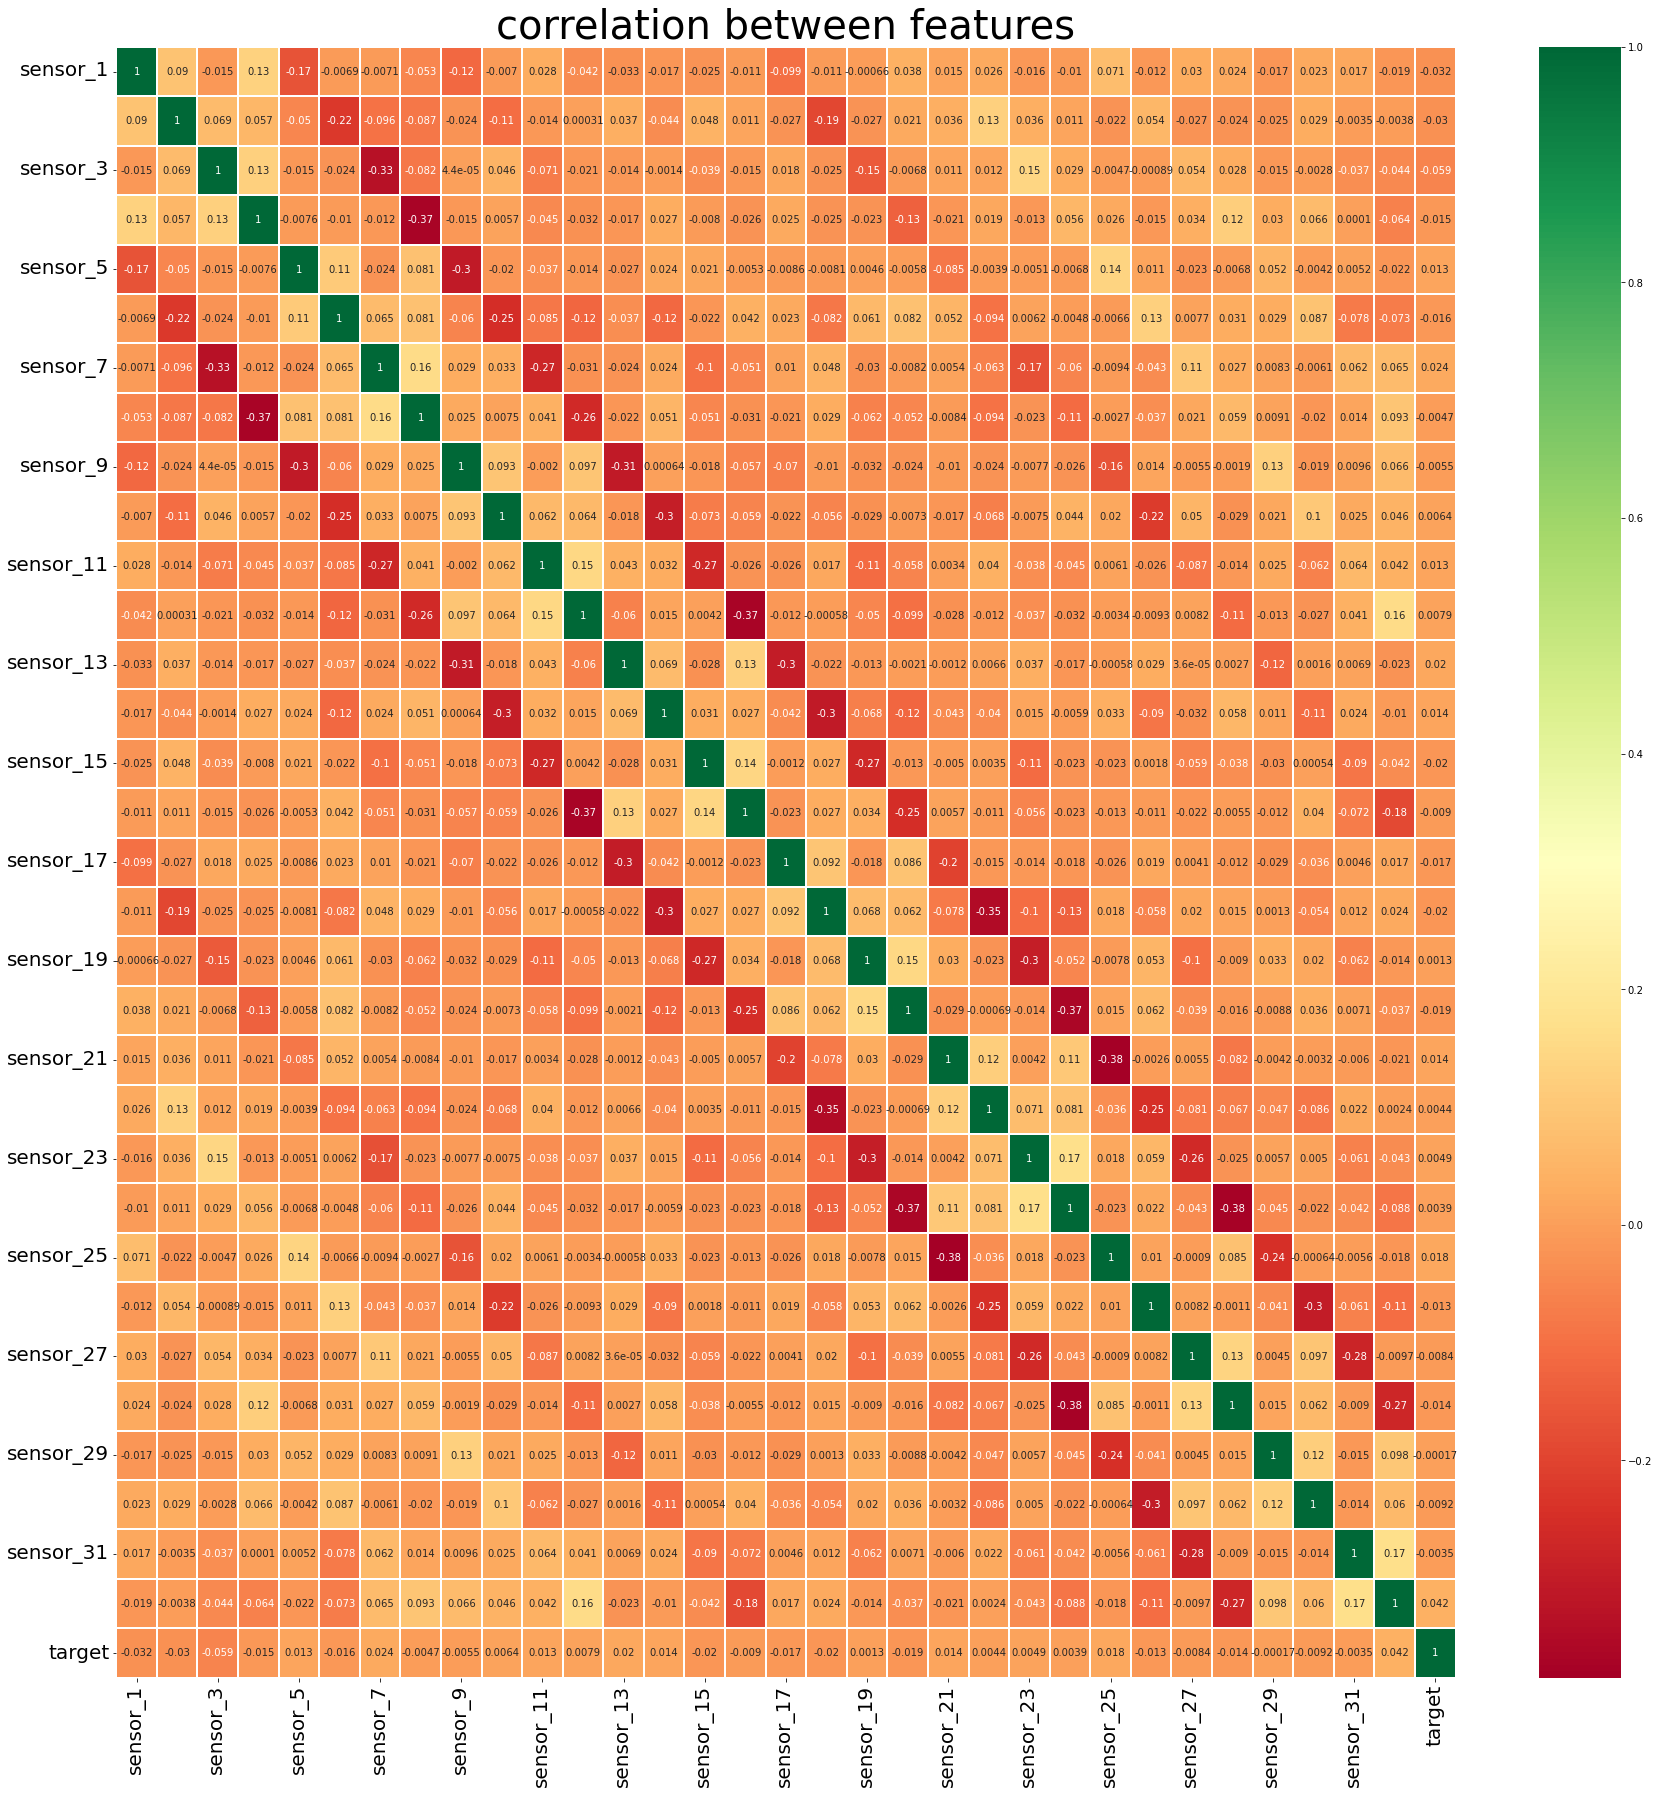

In [8]:
heatmap = sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(30,30)

heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=20)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=20)

plt.title('correlation between features', fontsize=40)

plt.show()

C:\Users\Root\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Root\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Root\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

C:\Users\Root\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Root\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Root\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

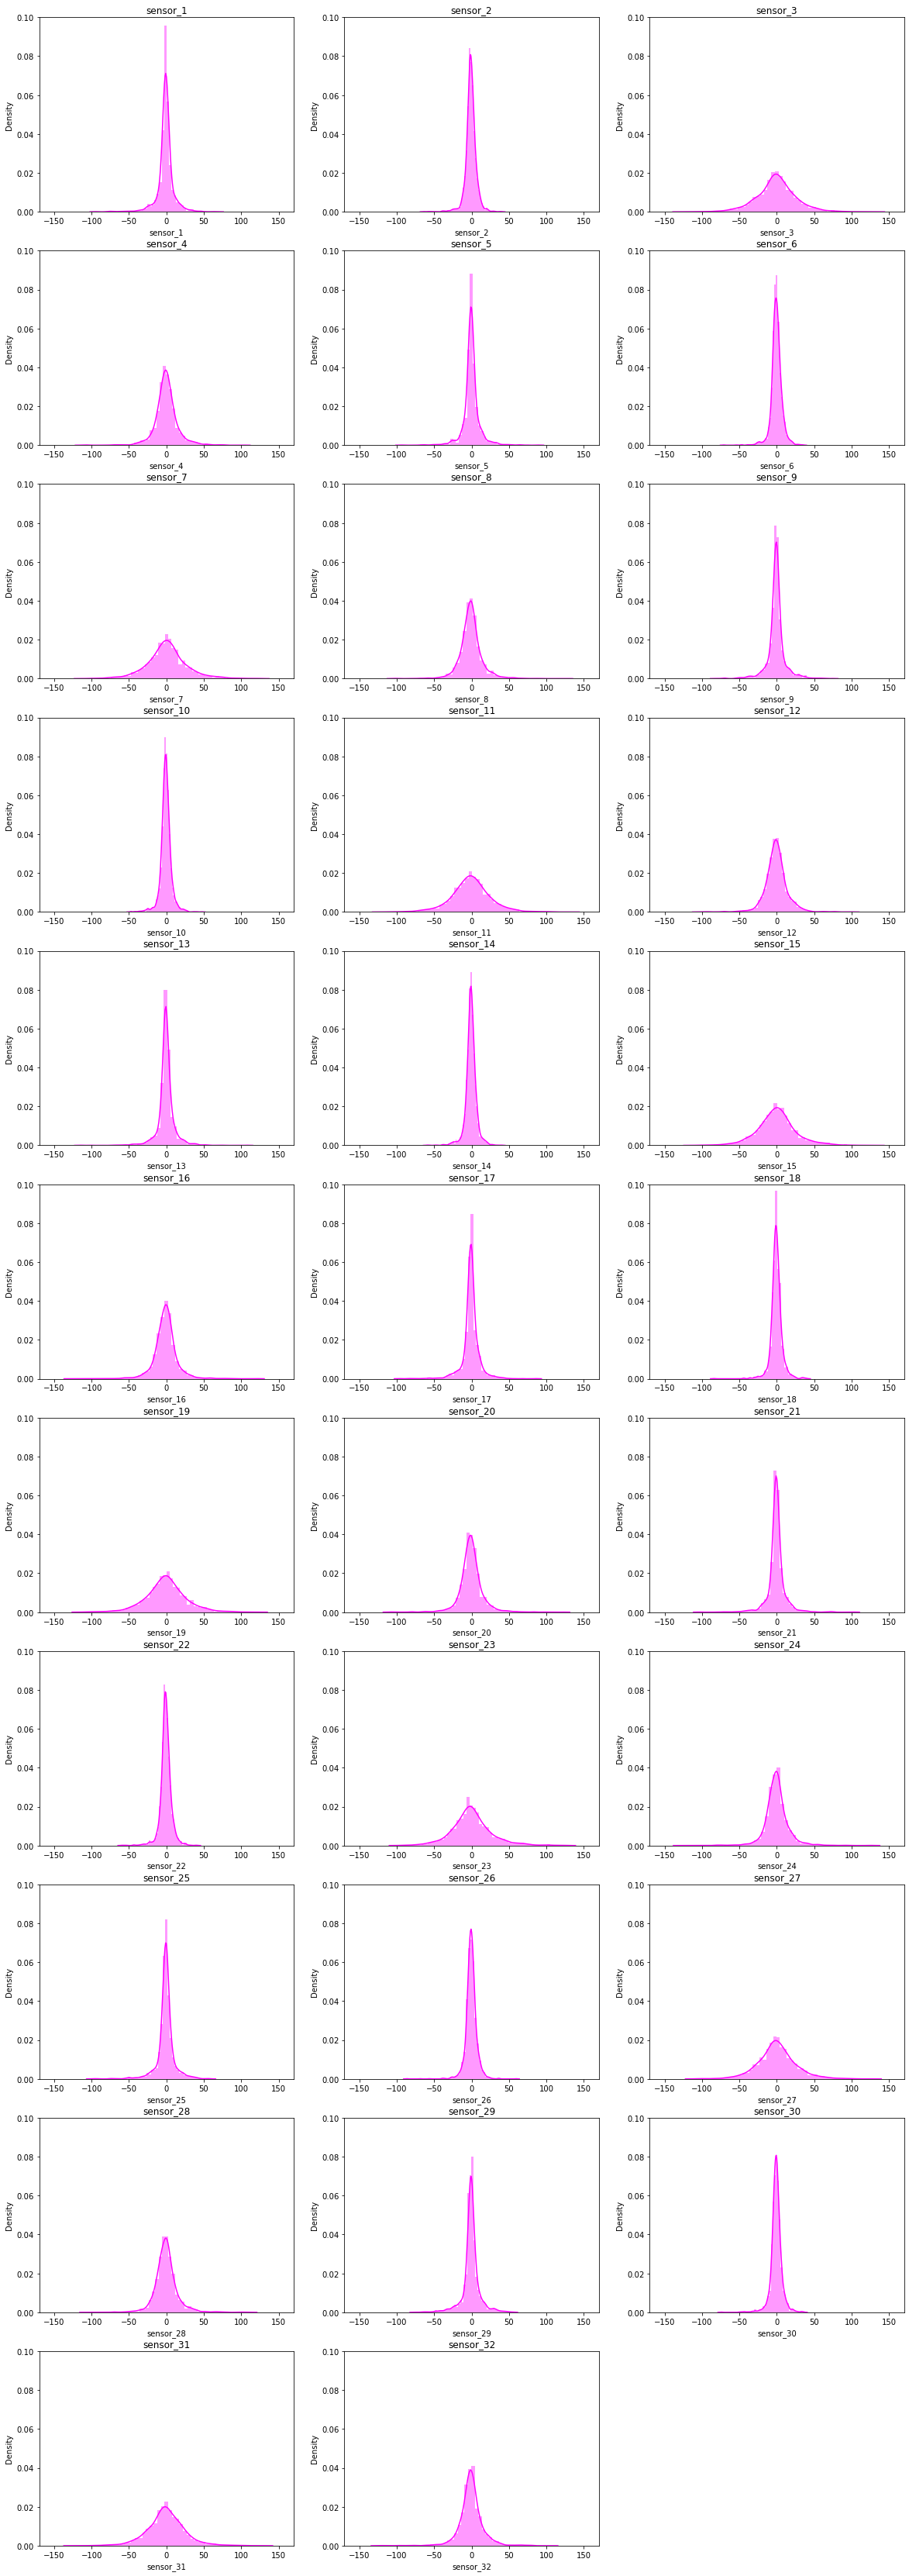

In [9]:
feature = train.columns
plt.figure(figsize=(20,60))

for i in range(len(feature)-1):
    plt.subplot(11,3,i+1)
    plt.title(feature[i])
    plt.xlim(-170,170)
    plt.ylim(0,0.1)
    sns.distplot(train[feature[i]],color='magenta')
plt.show()

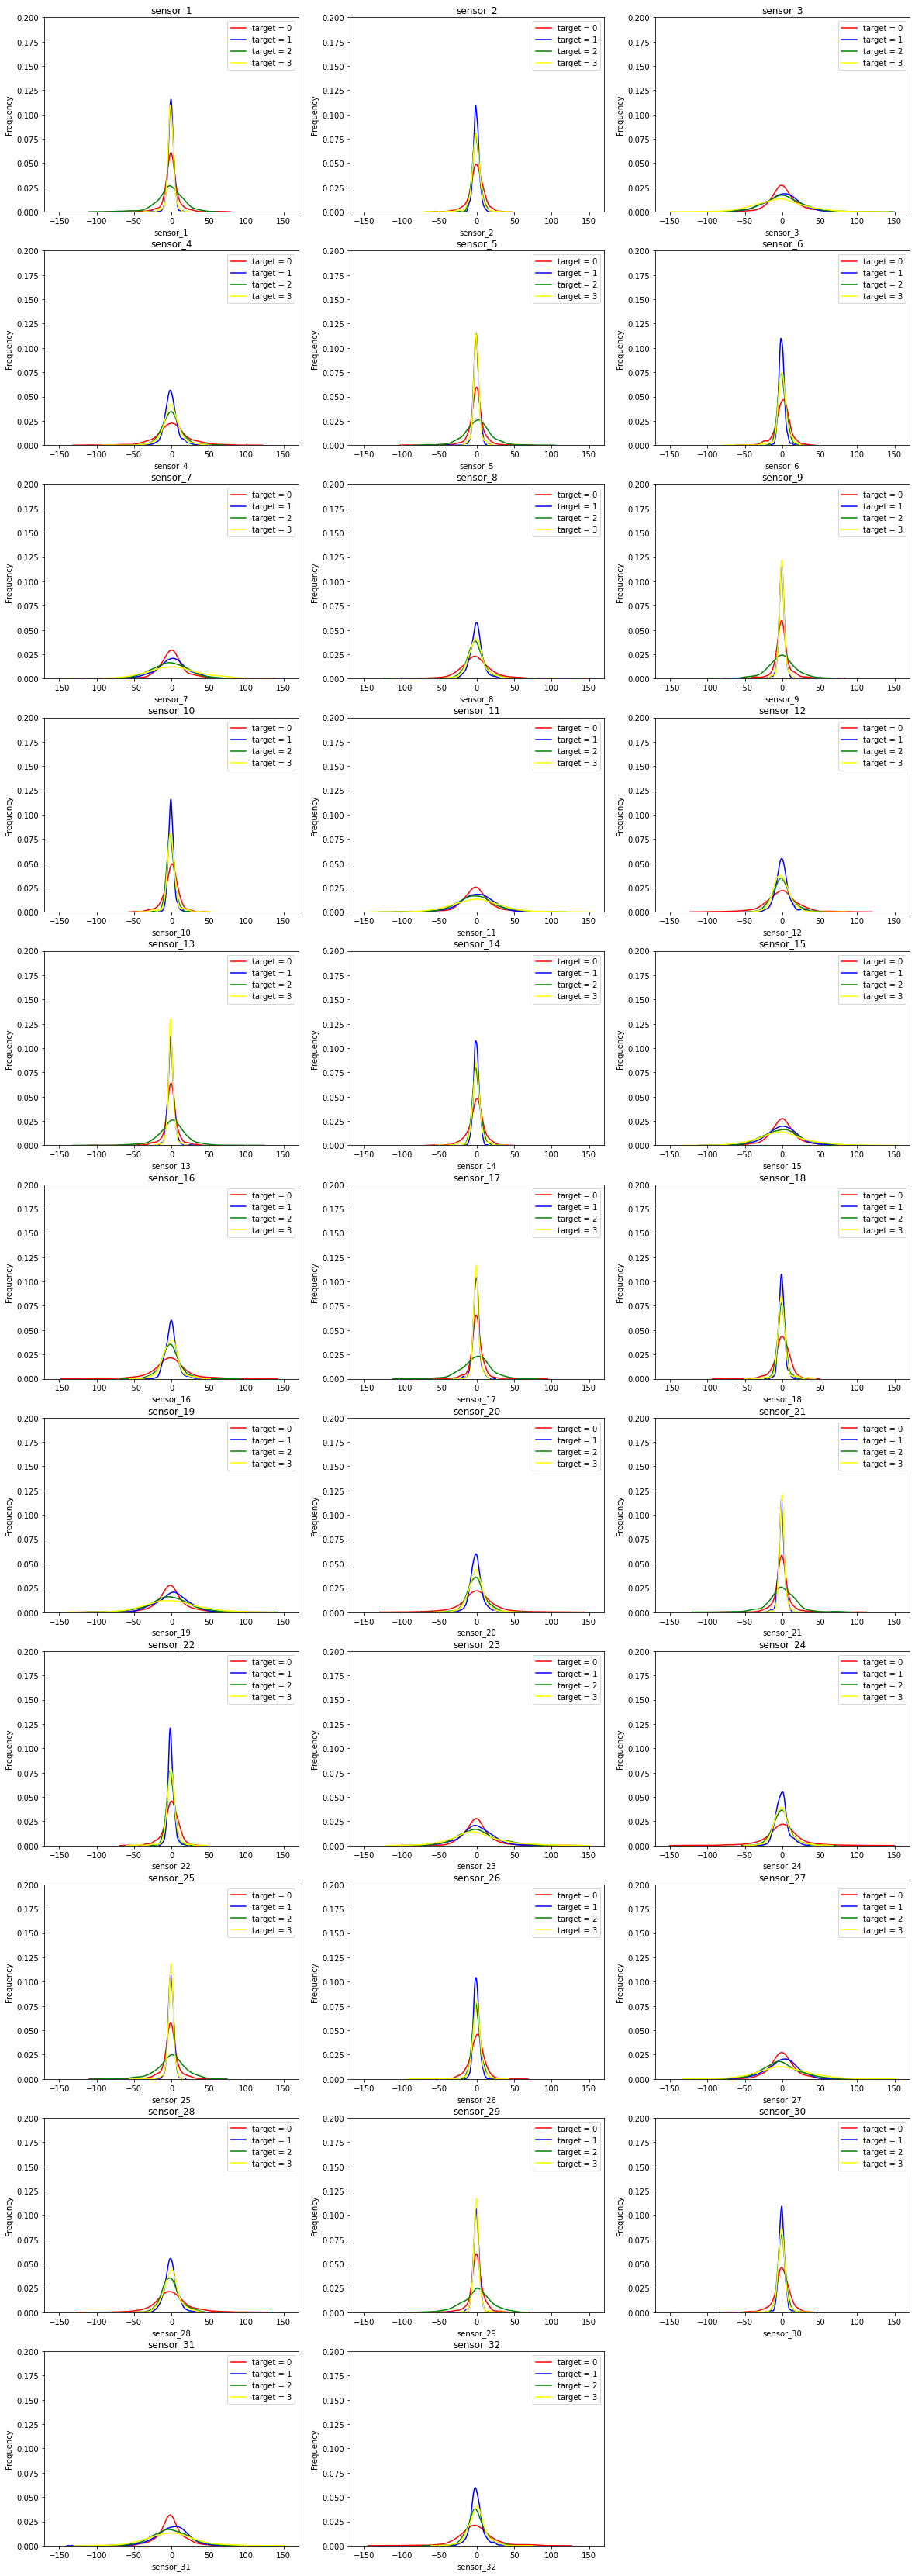

In [10]:
feature = train.columns
plt.figure(figsize=(20,60))

for i in range(len(feature)-1):
    plt.subplot(11,3,i+1)
    plt.title(feature[i])

    g = sns.kdeplot(train[feature[i]][(train['target'] == 0)], color="Red")
    g = sns.kdeplot(train[feature[i]][(train['target'] == 1)], ax =g, color="Blue")
    g = sns.kdeplot(train[feature[i]][(train['target'] == 2)], ax =g, color="green")
    g = sns.kdeplot(train[feature[i]][(train['target'] == 3)], ax =g, color="yellow")

    g.set_xlabel(feature[i])
    g.set_ylabel("Frequency")
    
    plt.xlim(-170,170)
    plt.ylim(0,0.2)
    g = g.legend(["target = 0","target = 1","target = 2","target = 3"])

plt.show()

### 데이터가 대칭적이므로 피처 간의 가중치 통일과 이상치로 인한 오분류를 줄이기 위해 minmaxscaling 실시 

In [11]:
from sklearn.preprocessing import MinMaxScaler
X= train.iloc[:, :-1]
y= train.iloc[:, -1]
Mmsc = MinMaxScaler()
X = Mmsc.fit_transform(X)
X

array([[0.54147306, 0.60673137, 0.52644741, ..., 0.62563154, 0.46574017,
        0.48893287],
       [0.56537327, 0.60602079, 0.51056301, ..., 0.66455976, 0.47420151,
        0.47188309],
       [0.69571409, 0.59553503, 0.49391236, ..., 0.63736401, 0.45742908,
        0.5187828 ],
       ...,
       [0.52404055, 0.67331837, 0.45744066, ..., 0.57205375, 0.46165367,
        0.53726777],
       [0.55468312, 0.64468   , 0.44218723, ..., 0.63708154, 0.55050526,
        0.48848449],
       [0.56782165, 0.54805576, 0.30610454, ..., 0.68397763, 0.40117625,
        0.48425937]])

### 피처간의 상관관계가 높은 페어를 추출

In [12]:
cor_data = train.corr()
l = []
for i in range(len(cor_data)):
    for j in range(len(cor_data)):
        if abs(cor_data.iloc[i,j]) > 0.3:
            if i < j:
                l.append((i,j))
            elif i > j:
                l.append((j, i))
l = list(set(l))
print(l)

[(23, 27), (20, 24), (17, 21), (13, 17), (19, 23), (3, 7), (12, 16), (11, 15), (2, 6), (4, 8), (8, 12)]


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=21)
print(len(X_train), len(X_test))

1868 467


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [15]:
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("결정 트리 예측 정확도: {0:.4f}".format(accuracy))
print(dt_clf.get_params())

결정 트리 예측 정확도: 0.5439
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [16]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24],
    'min_samples_split' : [16, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print(grid_cv.best_score_)
print(grid_cv.best_params_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
0.5856360482286992
{'max_depth': 24, 'min_samples_split': 24}


In [17]:
from sklearn.ensemble import RandomForestClassifier

params1 = {
    'n_estimators' : [100],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [8, 12, 18],
    'min_samples_split' : [8, 16, 20]
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv1 = GridSearchCV(rf_clf, param_grid=params1, cv=2, n_jobs=-1)
grid_cv1.fit(X_train, y_train)

print(grid_cv1.best_params_)
print(grid_cv1.best_score_)

{'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}
0.6798715203426124


In [18]:
best_df_clf = grid_cv1.best_estimator_

In [19]:
test.drop('id', axis=1, inplace=True)
test.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32
0,0.067135,5.040383,-2.965405,-12.952880,-1.938465,-10.997802,1.853669,21.077862,7.963131,0.009773,...,8.128448,5.871833,1.889536,-3.926719,0.929041,4.999071,-7.963270,4.044370,-1.993315,10.855771
1,6.890655,-12.010728,24.881907,38.943245,-4.757496,5.926453,7.923851,3.925545,4.012127,-6.921524,...,-7.941582,-27.106928,-16.940167,-11.169073,0.202975,6.846631,7.911875,-2.852819,56.028042,52.967175
2,-4.809695,0.962863,-1.893647,-6.168084,-3.948282,0.977219,12.960620,-9.048958,5.969053,0.874370,...,-0.895094,-7.984137,-0.025761,2.981749,4.948704,-10.841968,-4.860024,-6.917495,2.842422,-3.081374
3,0.018158,-3.993114,12.001667,22.960746,-2.121793,-6.002385,2.173744,1.045248,1.073869,-0.019322,...,-10.084452,2.828070,0.903349,5.156367,40.827713,-1.160840,-1.215552,0.037914,-24.968873,-7.148603
4,-7.841592,-2.129997,7.872448,-8.953428,28.080007,-5.019895,-10.922551,-15.045833,-56.981894,-8.831718,...,-2.000975,-23.942689,-6.741350,0.831967,11.905613,3.106004,46.899363,3.001353,-17.881074,-6.882390


In [21]:
pred = best_df_clf.predict(test)

submission = pd.read_csv('./sample_submission.csv')

submission['target'] = pred

In [24]:
submission.head(10)

,id,target
0,1,2
1,2,2
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [1]:
submission.to_csv('submit.csv',index=False, encoding='utf-8-sig')

NameError: name 'submission' is not defined